In [2]:
import sys
sys.path.append('/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods')
from settings import *
import helpers
%matplotlib inline
config_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/supplement/config"
config_dict = helpers.process_config(config_file)

# Output
figures_dir = config_dict["get_homologs"]["figures"]
results_dir = config_dict["get_homologs"]["results"]

# Get-homolog clusters
cluster_dir = config_dict["get_homologs"]["results"]
# Strain Info
strain_info = pd.read_csv(strain_info_file, index_col=0)
strains = config_dict["strains"]["all"].split()
good_strains = config_dict["strains"]["good"].split()
not_good_strains = config_dict["strains"]["not_good"].split()

/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods/helpers.py


In [5]:
files = [os.path.join(cluster_dir, f) for f in os.listdir(cluster_dir) if "__cluster_sizes.csv" in f and 'S70' not in f]
files

['/Users/annasintsova/git_repos/HUTI-RNAseq/results/supplement/test_gh_params/C60_S1_e1__cluster_sizes.csv',
 '/Users/annasintsova/git_repos/HUTI-RNAseq/results/supplement/test_gh_params/C50_S90_e1__cluster_sizes.csv',
 '/Users/annasintsova/git_repos/HUTI-RNAseq/results/supplement/test_gh_params/C70_S90_e1__cluster_sizes.csv',
 '/Users/annasintsova/git_repos/HUTI-RNAseq/results/supplement/test_gh_params/C70_S1_e1__cluster_sizes.csv',
 '/Users/annasintsova/git_repos/HUTI-RNAseq/results/supplement/test_gh_params/C50_S1_e1__cluster_sizes.csv',
 '/Users/annasintsova/git_repos/HUTI-RNAseq/results/supplement/test_gh_params/C60_S90_e1__cluster_sizes.csv']

In [23]:
dfs = []
for f in files:
    name = os.path.basename(f).split("_e1")[0]
    print(name)
    df = pd.read_csv(f, index_col=0)
    df.columns = [name+"_"+i for i in df.columns]
    dfs.append(df)

fdf = pd.concat(dfs, axis="columns")
fdf.head()

C60_S1
C50_S90
C70_S90
C70_S1
C50_S1
C60_S90


,C60_S1_COG,C60_S1_OMCL,C60_S1_Intersection,C50_S90_COG,C50_S90_OMCL,C50_S90_Intersection,C70_S90_COG,C70_S90_OMCL,C70_S90_Intersection,C70_S1_COG,C70_S1_OMCL,C70_S1_Intersection,C50_S1_COG,C50_S1_OMCL,C50_S1_Intersection,C60_S90_COG,C60_S90_OMCL,C60_S90_Intersection
0.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0
1.0,4936.0,NaN,NaN,4411.0,NaN,NaN,5490.0,NaN,NaN,5490.0,NaN,NaN,4411.0,NaN,NaN,4936.0,NaN,NaN
2.0,1097.0,1077.0,949.0,1008.0,1147.0,710.0,1191.0,1326.0,882.0,1191.0,1190.0,1039.0,1008.0,982.0,873.0,1097.0,1216.0,783.0
3.0,518.0,521.0,444.0,507.0,581.0,354.0,560.0,650.0,407.0,560.0,568.0,481.0,507.0,508.0,426.0,518.0,611.0,377.0
4.0,374.0,356.0,302.0,342.0,371.0,244.0,379.0,376.0,264.0,379.0,369.0,315.0,342.0,331.0,289.0,374.0,375.0,251.0


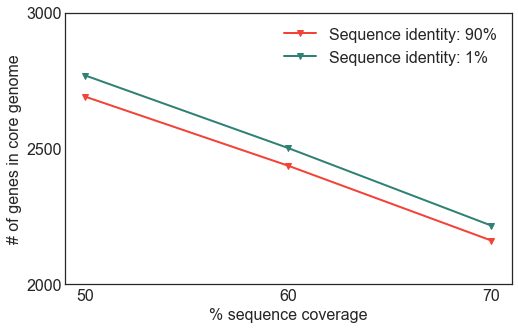

In [45]:
C = [50, 60, 70]
f = plt.figure(figsize=(8, 5))

#plt.subplot(121)
plt.plot(C, fdf[["C{}_S90_Intersection".format(str(c)) for c in C]].loc[15.0], 
         col1,marker='v', linewidth=2,label = "Sequence identity: 90%")
plt.plot(C, fdf[["C{}_S1_Intersection".format(str(c)) for c in C]].loc[15.0], 
         col4, marker='v', linewidth=2,label = "Sequence identity: 1%")
plt.ylim(2000, 3000)
plt.ylabel("# of genes in core genome", fontsize=16)
plt.xlabel("% sequence coverage", fontsize=16)
plt.xticks([50,60,70],fontsize=16)
plt.yticks([2000, 2500, 3000], fontsize=16)
plt.legend(fontsize=16)
fn = os.path.join(figures_dir, "Supplemental_figure_2a.png")
f.savefig(fn, dpi=300, bbox_inches="tight")